Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


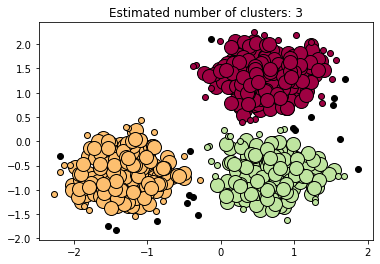

In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [14]:

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)


In [16]:
X.shape

(750, 2)

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [725]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("data.csv",index_col=0)


In [6]:
scale = StandardScaler()


In [703]:
item = data.tail(60)
item.fillna(method="ffill",inplace=True)
item.fillna(method="bfill",inplace=True)
t = scale.fit_transform(item)
item = pd.DataFrame(t,columns=item.columns)
item = item.transpose()

d:\envs\crypt\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [744]:
item

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
ALICE,0.794894,-0.520792,-0.191871,-0.849714,-2.494321,-1.507557,-1.507557,-1.836478,-1.836478,-1.836478,...,0.794894,1.123815,1.123815,1.123815,1.123815,1.123815,1.123815,1.123815,-0.191871,0.137051
BTC,-0.753436,-1.025079,-0.668322,-1.579835,-1.722290,-1.863846,-1.942438,-1.818872,-1.280532,-1.564769,...,-0.391844,0.165047,0.025628,-0.208350,0.599160,0.787601,1.419150,1.419038,0.895539,0.738017
ADA,-0.822062,-0.822062,-0.744387,-0.666712,-1.365789,-1.288114,-1.365789,-1.443464,-1.598814,-1.288114,...,1.663544,1.508193,1.430518,1.663544,1.818894,2.362620,2.284945,1.896569,1.197493,1.430518
BNB,-1.131549,-1.192276,-1.192276,-1.617366,-1.921001,-1.921001,-1.860274,-1.678093,-1.678093,-1.617366,...,0.811719,0.811719,1.115355,1.054628,1.115355,1.236809,1.358263,1.418991,1.236809,1.418991
QTUM,-1.607912,-1.824801,-1.445246,-2.109467,-2.299244,-2.068800,-2.217911,-2.204356,-1.879023,-1.445246,...,0.818528,0.886306,0.913417,0.682973,0.967639,0.832084,0.832084,1.252305,0.669417,1.021861
SUSHI,1.222680,1.086638,1.018617,0.202363,0.100331,0.168352,-0.375817,0.134342,0.134342,-1.124049,...,-0.919986,-0.988007,-1.192071,-1.294102,-1.294102,-1.056028,-0.851965,-1.022018,-1.702229,-1.464155
SHIB,0.257099,0.122570,0.167413,-0.056801,-0.236172,-1.133028,-1.133028,-0.953657,-0.550072,-0.774286,...,-0.011958,-0.056801,1.243640,1.781754,1.961125,2.095653,1.736911,2.140496,3.171881,2.813138
ALGO,-0.013533,-1.061703,-1.017414,-0.928837,-1.519355,-1.534118,-1.962244,-2.080348,-2.095111,-1.829378,...,0.813193,0.798430,0.813193,1.093690,1.388949,1.167505,1.374186,1.462764,1.226556,1.300371
CHR,-3.504010,-2.630052,-2.139409,-2.032080,-0.360827,-0.836138,-0.008177,0.129816,-0.360827,-0.176836,...,0.988442,1.172433,1.218431,1.003774,1.325759,0.850448,0.451801,0.543796,0.712455,0.145149
ATOM,-0.120317,-0.583075,-0.305420,-0.768178,-1.230936,-1.323488,-1.601143,-1.601143,-1.786246,-2.063901,...,0.434993,0.620096,0.527544,0.342441,0.434993,0.712647,0.527544,0.249889,0.527544,0.342441


<AxesSubplot:>

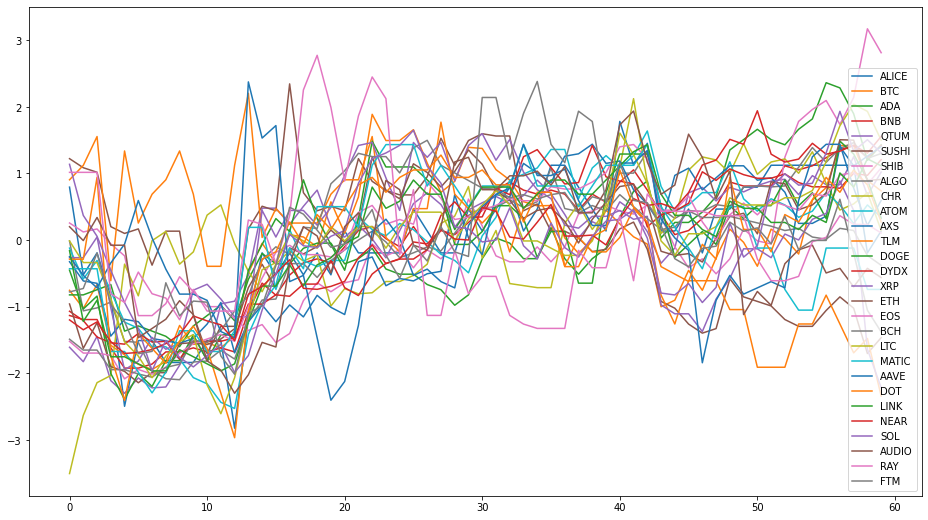

In [746]:

item.transpose().plot(figsize=(16,9))

In [720]:
model = DBSCAN(eps=3.8, min_samples=5).fit(item)
model.labels_

array([ 0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,
       -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1], dtype=int64)

In [721]:
model.labels_

array([ 0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,
       -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1], dtype=int64)

In [737]:
aa = model.labels_[model.labels_!=-1]

In [738]:
l = pd.Series(aa)

In [739]:
c = l.value_counts()
c

0    15
dtype: int64

In [740]:
c.index



Int64Index([0], dtype='int64')

In [742]:
for x in c.index:
    print(x)
    print(c.iloc[x])


0
15


In [722]:
model.core_sample_indices_

array([ 3,  7, 13, 15, 16, 22, 23], dtype=int64)

In [723]:
core = [True if x ==0 else False for x in model.labels_]
core2 = [True if x ==1 else False for x in model.labels_]

<Figure size 432x288 with 0 Axes>

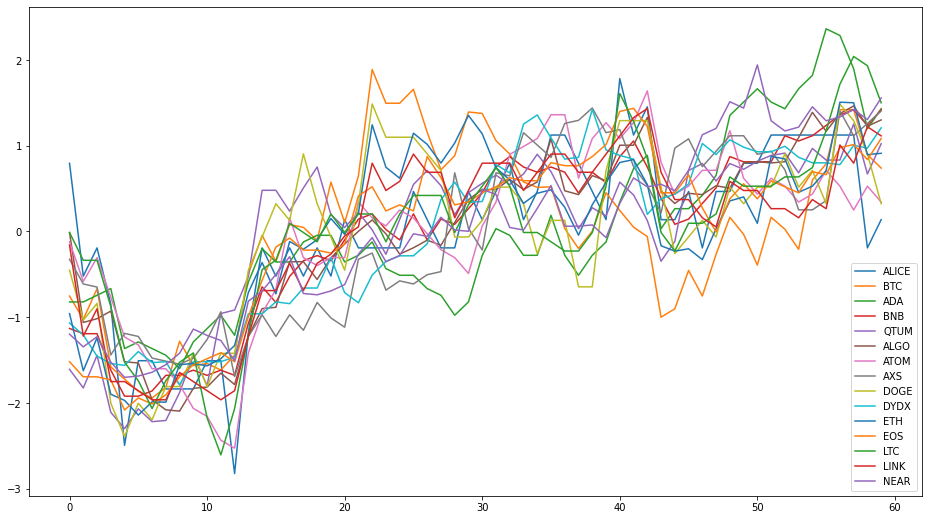

In [724]:
fig = plt.figure()
item[core].transpose().plot(figsize=(16,9))
# item[core2].transpose().plot(figsize=(16,9))
plt.show()

In [567]:
t.shape

(20, 28)

In [521]:
t.T.shape

(28, 15)

In [68]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
item


,ALICE,BTC,ADA,BNB,QTUM,SUSHI,SHIB,ALGO,CHR,ATOM,...,LTC,MATIC,AAVE,DOT,LINK,NEAR,SOL,AUDIO,RAY,FTM
0,1.890103,0.181953,-1.241907,0.007674,-0.221505,2.189710,-0.375688,0.250462,0.326519,1.152935,...,1.198593,1.619717,1.023795,1.454804,1.159459,-1.870669,-0.080724,1.569219,0.635384,2.085740
1,0.670682,-0.107291,-0.669600,0.468138,-0.620940,2.390908,-0.415654,0.250462,2.536297,1.689184,...,0.702623,1.619717,1.023795,0.369129,1.663572,-1.174606,0.084019,1.788691,-1.777467,1.053041
2,1.280393,-0.270399,-0.440677,-0.299301,-1.419811,1.586115,-0.295754,1.146426,-0.168207,2.761682,...,0.041331,2.069638,1.224539,-0.065140,1.915628,-1.418228,-0.410209,0.983963,1.439668,0.990453
3,-1.158450,-1.669442,-1.699753,-1.220228,-2.690741,0.043593,-0.455621,-1.215659,-1.817295,0.348562,...,-1.281254,0.719874,0.120446,-1.367950,0.151234,-1.348622,-1.365715,0.471863,0.796241,0.364574
4,-1.158450,-1.523398,-1.356369,-1.987667,-2.073432,-0.157605,-0.855289,-1.622915,-1.322568,-0.723936,...,-1.611901,0.269953,-0.180670,-1.585085,-0.604935,-1.522637,-1.398663,0.618177,0.796241,-0.542950
5,-0.548740,-0.857585,-1.356369,-1.834180,0.141618,-0.627069,-1.135056,-1.297110,0.227574,-0.455812,...,-1.115931,-0.179969,-0.381414,-1.802220,-0.604935,-0.965787,-1.200972,1.422905,0.796241,-0.762007
6,-1.768161,-1.301907,-1.127446,-1.373716,0.359492,-0.895333,-1.015156,-1.337836,0.656337,0.080437,...,-1.115931,-0.629890,-2.188111,-0.716545,-1.109048,0.008701,-1.530457,1.057120,0.796241,-0.261304
7,-0.548740,-0.579215,-0.784061,-0.913253,-0.185193,-0.761201,-1.214990,-1.052757,0.557392,0.080437,...,-0.950608,0.269953,-1.184390,-1.150815,-1.361104,0.182716,-1.266869,0.398706,0.635384,-0.198716
8,-0.548740,0.064683,0.246092,0.007674,0.359492,0.714255,-1.015156,-1.134208,0.128629,1.421060,...,-0.289315,0.719874,-0.782902,1.237669,-0.100823,0.913582,-0.146621,0.837649,0.635384,0.458456
9,0.060971,-0.230918,0.475015,-0.145813,0.177930,0.177725,-0.615488,-0.319696,1.085100,-0.187687,...,-0.454639,0.719874,-1.084018,-0.282275,-0.352879,0.739567,-0.739693,-1.430221,0.635384,0.208105


In [80]:
item.shape

(20, 28)

In [82]:
item.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ALICE,1.890103,0.670682,1.280393,-1.158450,-1.158450,-0.548740,-1.768161,-0.548740,-0.548740,0.060971,0.060971,0.670682,0.670682,0.670682,0.670682,0.670682,0.670682,0.670682,-1.768161,-1.158450
BTC,0.181953,-0.107291,-0.270399,-1.669442,-1.523398,-0.857585,-1.301907,-0.579215,0.064683,-0.230918,-0.764405,0.064181,-0.143259,-0.491388,0.710086,0.990464,1.930130,1.929962,1.151062,0.916689
ADA,-1.241907,-0.669600,-0.440677,-1.699753,-1.356369,-1.356369,-1.127446,-0.784061,0.246092,0.475015,0.703938,0.475015,0.360554,0.703938,0.932861,1.734092,1.619630,1.047323,0.017169,0.360554
BNB,0.007674,0.468138,-0.299301,-1.220228,-1.987667,-1.834180,-1.373716,-0.913253,0.007674,-0.145813,-0.145813,-0.145813,0.621626,0.468138,0.621626,0.928601,1.235577,1.389065,0.928601,1.389065
QTUM,-0.221505,-0.620940,-1.419811,-2.690741,-2.073432,0.141618,0.359492,-0.185193,0.359492,0.177930,0.432116,0.613678,0.686302,0.068993,0.831552,0.468429,0.468429,1.594110,0.032681,0.976801
SUSHI,2.189710,2.390908,1.586115,0.043593,-0.157605,-0.627069,-0.895333,-0.761201,0.714255,0.177725,0.043593,-0.090539,-0.492936,-0.694135,-0.694135,-0.224672,0.177725,-0.157605,-1.498929,-1.029465
SHIB,-0.375688,-0.415654,-0.295754,-0.455621,-0.855289,-1.135056,-1.015156,-1.214990,-1.015156,-0.615488,-0.775355,-0.815322,0.343714,0.823315,0.983182,1.103083,0.783349,1.143049,2.062285,1.742551
ALGO,0.250462,0.250462,1.146426,-1.215659,-1.622915,-1.297110,-1.337836,-1.052757,-1.134208,-0.319696,-0.278970,-0.319696,-0.278970,0.494816,1.309328,0.698444,1.268602,1.512956,0.861346,1.064974
CHR,0.326519,2.536297,-0.168207,-1.817295,-1.322568,0.227574,0.656337,0.557392,0.128629,1.085100,0.095647,0.491428,0.590373,0.128629,0.821246,-0.201189,-1.058714,-0.860824,-0.498024,-1.718349
ATOM,1.152935,1.689184,2.761682,0.348562,-0.723936,-0.455812,0.080437,0.080437,1.421060,-0.187687,-0.723936,-0.187687,-0.455812,-0.992061,-0.723936,0.080437,-0.455812,-1.260185,-0.455812,-0.992061
